## **Import Packages**

In [3]:
# Import the numpy, pandas and other required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import string
from sklearn.svm import LinearSVC
from wordcloud import WordCloud, STOPWORDS
import missingno as msno
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker
import re
import nltk
from nltk.probability import FreqDist
from spellchecker import SpellChecker

In [4]:
# spell checker
#!pip install pyspellchecker

In [5]:
#pip install -U textblob

## **Load the Dataset**

In [7]:
#df_online_product = pd.read_csv("/content/drive/My Drive/GrammarandProductReviews.csv")
df = pd.read_csv("./GrammarandProductReviews.csv")

# **Text Pre-processing**

In [8]:
print("Shape :", df.shape)

Shape : (71044, 25)


In [20]:
print("Columns :")
print(df.columns)

Columns :
Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='object')


### **Rename the Columns**

In [21]:
# Rename the column names
col_names = df.columns
new_col_names = [i.replace(".","_") for i in col_names]
df.columns = new_col_names

In [22]:
df.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews_date',
       'reviews_dateAdded', 'reviews_dateSeen', 'reviews_didPurchase',
       'reviews_doRecommend', 'reviews_id', 'reviews_numHelpful',
       'reviews_rating', 'reviews_sourceURLs', 'reviews_text', 'reviews_title',
       'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'upc'],
      dtype='object')

In [23]:
print("Datatypes :\n",df.dtypes)

Datatypes :
 id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews_date             object
reviews_dateAdded        object
reviews_dateSeen         object
reviews_didPurchase      object
reviews_doRecommend      object
reviews_id              float64
reviews_numHelpful      float64
reviews_rating            int64
reviews_sourceURLs       object
reviews_text             object
reviews_title            object
reviews_userCity         object
reviews_userProvince     object
reviews_username         object
upc                      object
dtype: object


In [24]:
print("Info :")
print(df.info())

Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews_date          70977 non-null  object 
 11  reviews_dateAdded     71044 non-null  object 
 12  reviews_dateSeen      71044 non-null  object 
 13  reviews_didPurchase   32158 non-null  object 
 14  reviews_doRecommend   60429 non-null  object 
 15  reviews_id  

In [25]:
print("Missing Value Count :")
print(df.isnull().sum())

Missing Value Count :
id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews_date               67
reviews_dateAdded           0
reviews_dateSeen            0
reviews_didPurchase     38886
reviews_doRecommend     10615
reviews_id              38886
reviews_numHelpful      38536
reviews_rating              0
reviews_sourceURLs          0
reviews_text               36
reviews_title             476
reviews_userCity        65634
reviews_userProvince    70595
reviews_username           96
upc                         2
dtype: int64


### **Percentage of missing values per column**

In [26]:
null_percent = round(100*(df.isnull().sum()/len(df.index)), 2)  # Creating a series with columns and it's null %
null_percent[null_percent > 0].sort_values(ascending=False)   # Printing only columns where null values are present

reviews_userProvince    99.37
reviews_userCity        92.39
reviews_id              54.74
reviews_didPurchase     54.74
reviews_numHelpful      54.24
ean                     45.01
reviews_doRecommend     14.94
reviews_title            0.67
manufacturerNumber       0.29
manufacturer             0.20
reviews_username         0.14
reviews_date             0.09
reviews_text             0.05
dtype: float64

#### Visualization of Missing Values

In [27]:
#msno.matrix(df)

<AxesSubplot:>

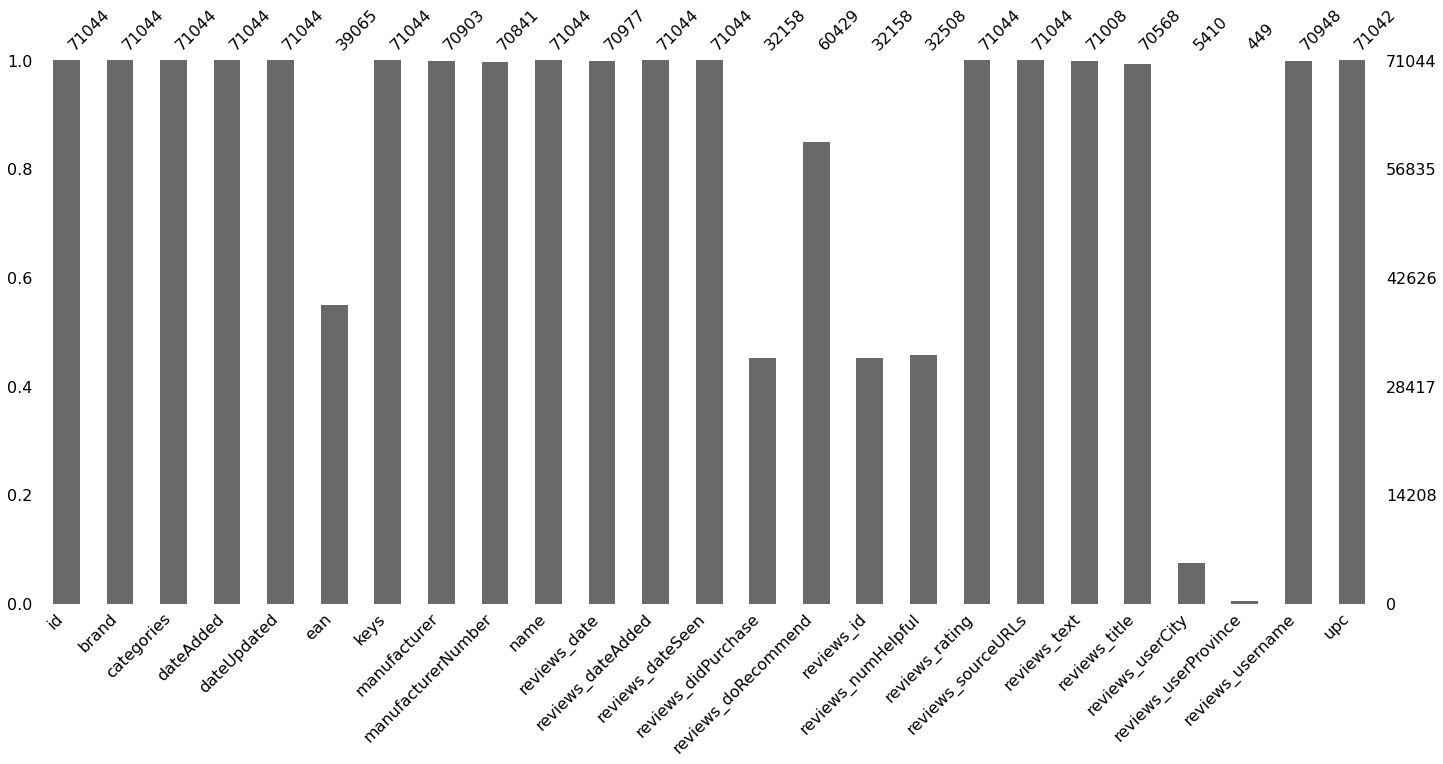

In [28]:
msno.bar(df)

In [29]:
#msno.heatmap(df)

#### Drop the columns with less than 20% of values

In [30]:
df_bkp = df.copy()

In [69]:
#df = df_bkp.copy()

In [70]:
print("Shape :", df.shape)

Shape : (71044, 25)


In [71]:
null_percent=round(100*(df.isnull().sum()/len(df.index)), 2) # Missing % of each column
null_percent=null_percent[null_percent.values>80] # filtering only columns with missing % more than 80%
null_percent = list(null_percent.index) # storing index (column names) with missing% more than 80 in a list.
df.drop(labels=null_percent,axis=1,inplace=True)  # Dropping all those columns

In [72]:
# Shape of Dataset
print("Shape :", df.shape)

Shape : (71044, 23)


### Drop the rows where "reviews.text" or "reviews.date" feature has Null values

In [73]:
# removing rows where a particular column has high missing values because the column cannot be removed because of its importance
df = df[~pd.isnull(df['reviews_date'])]
df = df[~pd.isnull(df['reviews_text'])]

In [74]:
# Shape of Dataset
print("Shape :", df.shape)

Shape : (70941, 23)


In [75]:
df["reviews_text"].head(10)

0    i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen...
1                                                   Good flavor. This review was collected as part of a promotion.
2                                                                                                     Good flavor.
3    I read through the reviews on here before looking in to buying one of the couples lubricants, and was ulti...
4    My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wo...
5    My boyfriend and I bought this to spice things up in the bedroom and we were both highly disappointed in t...
6    Bought this earlier today and was excited to check it out. Based on the product description I was expectin...
7    I bought this product for my husband and I to try and we were not impressed at all. There was no tingling ...
8    My husband and I bought this for some extra fun. We werevboth extremely dis

In [15]:
pd.set_option('display.max_colwidth', 110)
#pd.set_option('display.max_colwidth', None)

In [77]:
df["reviews_text"].head(10)

0    i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen...
1                                                   Good flavor. This review was collected as part of a promotion.
2                                                                                                     Good flavor.
3    I read through the reviews on here before looking in to buying one of the couples lubricants, and was ulti...
4    My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wo...
5    My boyfriend and I bought this to spice things up in the bedroom and we were both highly disappointed in t...
6    Bought this earlier today and was excited to check it out. Based on the product description I was expectin...
7    I bought this product for my husband and I to try and we were not impressed at all. There was no tingling ...
8    My husband and I bought this for some extra fun. We werevboth extremely dis

### **Combine Review Text and Title into one**

In [78]:
df['reviews_text'] = df['reviews_title'].fillna('') + '! ' + df['reviews_text'].fillna('')

In [79]:
df["reviews_text"].head(10)

0    Just Awesome! i love this album. it's very good. more to the hip hop side than her current pop sound.. SO ...
1                                             Good! Good flavor. This review was collected as part of a promotion.
2                                                                                               Good! Good flavor.
3    Disappointed! I read through the reviews on here before looking in to buying one of the couples lubricants...
4    Irritation! My husband bought this gel for us. The gel caused irritation and it felt like it was burning m...
5    Not worth it! My boyfriend and I bought this to spice things up in the bedroom and we were both highly dis...
6    Disappointing! Bought this earlier today and was excited to check it out. Based on the product description...
7    Not happy at all! I bought this product for my husband and I to try and we were not impressed at all. Ther...
8    Very disappointing! My husband and I bought this for some extra fun. We wer

<AxesSubplot:>

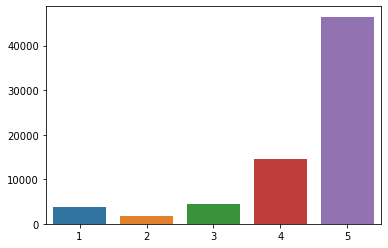

In [80]:
data = df['reviews_rating'].value_counts()
sns.barplot(x=data.index, y=data.values)

In [81]:
# Dropping column reviews_title
df = df.drop('reviews_title', axis=1)

### **Lowercasing**

In [82]:
df["reviews_text"] = df["reviews_text"].str.lower()
df["reviews_text"][5:10]

5    not worth it! my boyfriend and i bought this to spice things up in the bedroom and we were both highly dis...
6    disappointing! bought this earlier today and was excited to check it out. based on the product description...
7    not happy at all! i bought this product for my husband and i to try and we were not impressed at all. ther...
8    very disappointing! my husband and i bought this for some extra fun. we werevboth extremely disappointed. ...
9    don't buy! got as a surprise for my husband there is nothing special about it just a lube save the money a...
Name: reviews_text, dtype: object

### **Remove URL's**

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [85]:
df["reviews_text"][7249]

'u1l2d1! start working when mixed with water, which allows you to enjoy whiter laundry and cleaner surfaces without the spills. do not mix with bleach or other household products. always read and follow precautions and usage directions before using cleaning products read more at https://www.clorox.com/products/clorox-control-bleach-packs/va5foomhiiibyabv.99'

In [86]:
text = "Upgrad dashboard home page is at https://learn.upgrad.com/v/course/524/dashboard/ please visit "
remove_urls(text)

'Upgrad dashboard home page is at  please visit '

In [87]:
df["reviews_text"] = df["reviews_text"].apply(lambda text: remove_urls(text))

In [88]:
df["reviews_text"][7249]

'u1l2d1! start working when mixed with water, which allows you to enjoy whiter laundry and cleaner surfaces without the spills. do not mix with bleach or other household products. always read and follow precautions and usage directions before using cleaning products read more at '

### **Remove Punctuation**

In [89]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["reviews_text"] = df["reviews_text"].apply(lambda text: remove_punctuation(text))

In [90]:
PUNCT_TO_REMOVE

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [91]:
df["reviews_text"].head(10)

0    just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i...
1                                                good good flavor this review was collected as part of a promotion
2                                                                                                 good good flavor
3    disappointed i read through the reviews on here before looking in to buying one of the couples lubricants ...
4    irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my ...
5    not worth it my boyfriend and i bought this to spice things up in the bedroom and we were both highly disa...
6    disappointing bought this earlier today and was excited to check it out based on the product description i...
7    not happy at all i bought this product for my husband and i to try and we were not impressed at all there ...
8    very disappointing my husband and i bought this for some extra fun we werev

In [92]:
print("Shape :", df.shape)

Shape : (70941, 22)


### **Remove Stopwords**

In [55]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["reviews_text"] = df["reviews_text"].apply(lambda text: remove_stopwords(text))

In [93]:
df["reviews_text"][5:10]

5    not worth it my boyfriend and i bought this to spice things up in the bedroom and we were both highly disa...
6    disappointing bought this earlier today and was excited to check it out based on the product description i...
7    not happy at all i bought this product for my husband and i to try and we were not impressed at all there ...
8    very disappointing my husband and i bought this for some extra fun we werevboth extremely disappointed esp...
9    dont buy got as a surprise for my husband there is nothing special about it just a lube save the money and...
Name: reviews_text, dtype: object

### **Lemmatization**

In [94]:
df["reviews_text"][:10]

0    just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i...
1                                                good good flavor this review was collected as part of a promotion
2                                                                                                 good good flavor
3    disappointed i read through the reviews on here before looking in to buying one of the couples lubricants ...
4    irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my ...
5    not worth it my boyfriend and i bought this to spice things up in the bedroom and we were both highly disa...
6    disappointing bought this earlier today and was excited to check it out based on the product description i...
7    not happy at all i bought this product for my husband and i to try and we were not impressed at all there ...
8    very disappointing my husband and i bought this for some extra fun we werev

In [95]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [99]:
# commenting temporarly
df["reviews_text"] = df["reviews_text"].apply(lambda text: lemmatize_words(text))

In [100]:
df["reviews_text"][:10]

0    just awesome i love this album it very good more to the hip hop side than her current pop sound so hype i ...
1                                                  good good flavor this review wa collected a part of a promotion
2                                                                                                 good good flavor
3    disappointed i read through the review on here before looking in to buying one of the couple lubricant and...
4    irritation my husband bought this gel for u the gel caused irritation and it felt like it wa burning my sk...
5    not worth it my boyfriend and i bought this to spice thing up in the bedroom and we were both highly disap...
6    disappointing bought this earlier today and wa excited to check it out based on the product description i ...
7    not happy at all i bought this product for my husband and i to try and we were not impressed at all there ...
8    very disappointing my husband and i bought this for some extra fun we werev

### **Spelling Correction**

In [47]:
spell = SpellChecker()
df["reviews_text"] = df["reviews_text"].apply(lambda text:' '.join(spell.correction(word) for word in nltk.word_tokenize(text)))

In [48]:
#df.to_csv("./Updated_GrammarandProductReviews.csv")

In [49]:
df["reviews_text"][5:10]

5    worth boyfriend bought spice thing bedroom highly disappointed product bought one absolutely love ky mine ...
6    disappointing bought earlier today excited check based product description expecting something like regula...
7    happy bought product husband try impressed tingling warming left u sticky used ky product past loved ky on...
8    disappointing husband bought extra fun werevboth extremely disappointed especially price waste money produ...
9    dont buy got surprise husband nothing special lube save money get plain ky need lube wish could return refund
Name: reviews_text, dtype: object

In [5]:
#df = pd.read_csv("./Updated_GrammarandProductReviews.csv")

### **Noise Removal**

In [10]:
def scrub_words(text):
    # remove html markup
    text=re.sub("(<.*?>)","",text)
    
    # remove non ASCII and digits
    text=re.sub("(\\W|\\d)"," ",text)
    
    # remove whitespace
    text=text.strip()
    return text

In [11]:
df["reviews_text"][5:10]

5    worth boyfriend bought spice thing bedroom hig...
6    disappointing bought earlier today excited che...
7    happy bought product husband try impressed tin...
8    disappointing husband bought extra fun werevbo...
9    dont buy got surprise husband nothing special ...
Name: reviews_text, dtype: object

In [12]:
df["reviews_text"] = df["reviews_text"].apply(lambda text: scrub_words(text))

In [13]:
df["reviews_text"][5:10]

5    worth boyfriend bought spice thing bedroom hig...
6    disappointing bought earlier today excited che...
7    happy bought product husband try impressed tin...
8    disappointing husband bought extra fun werevbo...
9    dont buy got surprise husband nothing special ...
Name: reviews_text, dtype: object

### **Word Count**

In [34]:
from nltk.tokenize import sent_tokenize, word_tokenize 

In [17]:
def word_count(text):
    text_count=word_tokenize(text)
    return len(text_count)

text_count=df["reviews_text"].apply(lambda text: word_count(text))

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


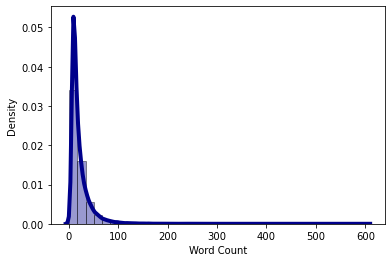

In [18]:
# Density Plot and Histogram of all Word Count
sns.distplot(text_count, hist=True, kde=True,
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.xlabel('Word Count')
plt.ylabel('Density')
plt.show()

### **Top 30 Common Words**

In [120]:
# Function to plot most frequent terms
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    fdist = FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    
    # Selecting 30 least frequent words
    d = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(20,10))
    ax = sns.barplot(data=d, x="count", y="word")
    ax.set(ylabel="Word")
    plt.show()

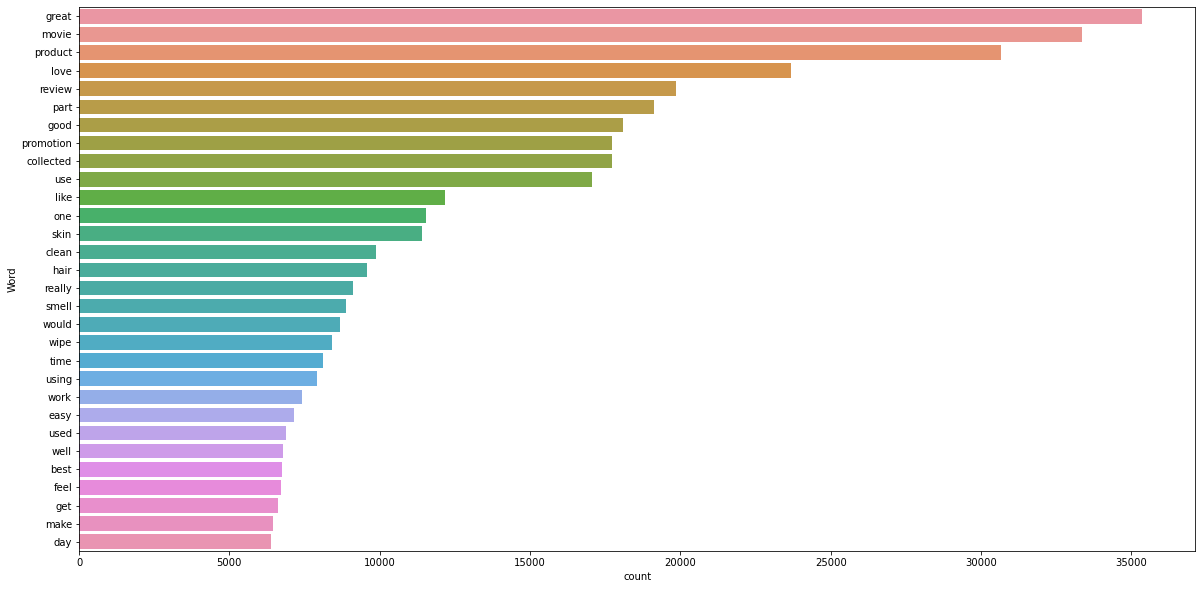

In [121]:
freq_words(df['reviews_text'])

### **Top 30 Rare Words**

In [122]:
# Function to plot least frequent terms
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    fdist = FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    
    # Selecting top 30 least frequent words
    d = words_df.nsmallest(columns='count', n=terms)
    plt.figure(figsize=(20,10))
    ax = sns.barplot(data=d, x="count", y="word")
    ax.set(ylabel="Word")
    plt.show()

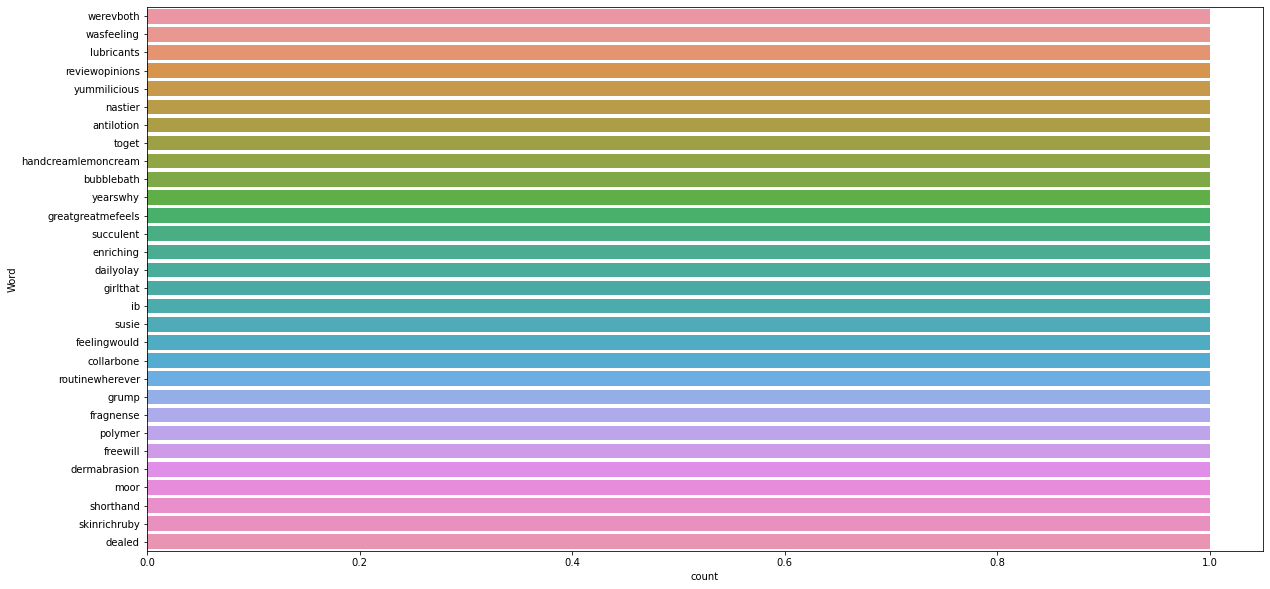

In [123]:
freq_words(df['reviews_text'])

### **N-grams using TextBlob**

In [64]:
from textblob import TextBlob

In [65]:
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = TextBlob(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

In [66]:
data = 'A class is a blueprint for the object.'
 
print("1-gram: ", extract_ngrams(data, 1))
print("2-gram: ", extract_ngrams(data, 2))
print("3-gram: ", extract_ngrams(data, 3))
print("4-gram: ", extract_ngrams(data, 4))

1-gram:  ['A', 'class', 'is', 'a', 'blueprint', 'for', 'the', 'object']
2-gram:  ['A class', 'class is', 'is a', 'a blueprint', 'blueprint for', 'for the', 'the object']
3-gram:  ['A class is', 'class is a', 'is a blueprint', 'a blueprint for', 'blueprint for the', 'for the object']
4-gram:  ['A class is a', 'class is a blueprint', 'is a blueprint for', 'a blueprint for the', 'blueprint for the object']


# **Exploratory Data Analysis**

### **Distribution of top 25 reviewed brands**

In [6]:
brand_count=df['brand'].value_counts()
df_brand_count= brand_count.to_frame(name='review_count')[:25] # Picking top 25 rows based on count
df_brand_count=df_brand_count.reset_index()

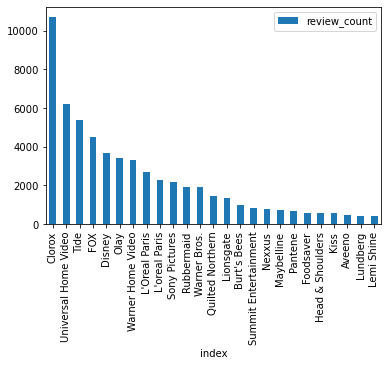

In [7]:
df_brand_count.plot(x ='index', y = 'review_count', kind = "bar")
plt.show()

### **Distribution of top 25 reviewed manufactures**

In [8]:
manufacturer_count=df['manufacturer'].value_counts()
df_manufacturer_count= manufacturer_count.to_frame(name='review_count')[:25]
df_manufacturer_count=df_manufacturer_count.reset_index()

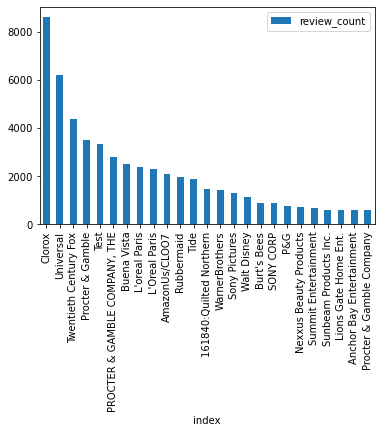

In [9]:
df_manufacturer_count.plot(x ='index', y = 'review_count', kind = "bar")
plt.show()

### Word Cloud

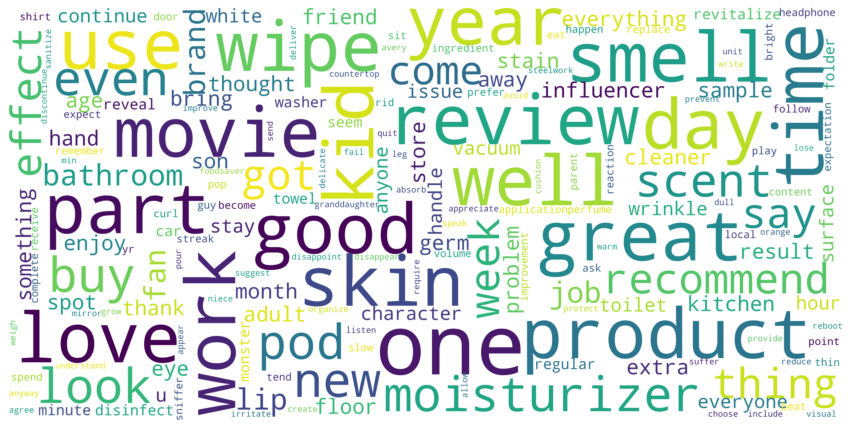

In [35]:
# try to tokenize to individual word (uni-gram) - reviews.title
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews_text'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###  Genuine Reviews
##### shoppers who did purchased the product and provided the review 

In [115]:
df['reviews_didPurchase'] = df['reviews_didPurchase'].fillna('Not Avialable') 

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


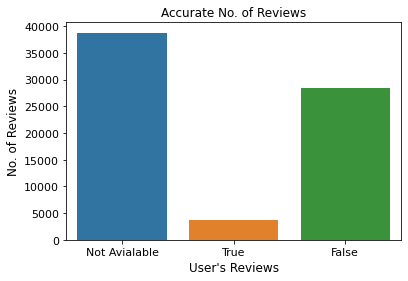

In [116]:
ax_plt = sns.countplot(df['reviews_didPurchase'])
ax_plt.set_xlabel(xlabel="User's Reviews",fontsize=12)
ax_plt.set_ylabel(ylabel='No. of Reviews',fontsize=12)
ax_plt.axes.set_title('Accurate No. of Reviews',fontsize=12)
ax_plt.tick_params(labelsize=11)

## **Topic Modelling - TF-IDF Vectorizer**

In [10]:
all_text=df['reviews_text']
train_text=df['reviews_text']
y=df['reviews_rating']

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [12]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)

In [13]:
df2=pd.DataFrame(train_word_features.toarray(), columns = word_vectorizer.get_feature_names())

In [14]:
df2.head(2)

,0,01375,1,10,100,1000,10000,1010,1012,1015,...,zinc,zing,zip,ziploc,ziplock,zipper,zit,zombie,zone,zootopia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    #stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])

In [17]:
train_features.shape

(70941, 60000)

# **Training Data Preparation**

### **Splitting the dataset into train and test**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101)

In [19]:
from sklearn.metrics import roc_auc_score

In [20]:
from sklearn.model_selection import cross_val_score

# **ML Model**

### **Logistic Regression**

In [21]:
##Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(max_iter=1000)

In [22]:
lr0.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [23]:
preds=lr0.predict(X_test)

In [24]:
rf_accuracy=metrics.accuracy_score(preds,y_test)
rf_accuracy

0.7349997650707137

In [36]:
#lr0.best_score_

### **Random Forest Classifier**

In [25]:
### Random forest classifier

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
preds2=classifier.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
rf_accuracy2=accuracy_score(preds2,y_test)
rf_accuracy2

0.7362213973593948

### **XGBoost**

In [29]:
### XGBoost

import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(X_train,y_train)
preds3=xgb.predict(X_test)

In [30]:
rf_accuracy3=accuracy_score(preds3,y_test)
rf_accuracy3

0.7050227881407696

### Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB # using multiNomial Naive Bayes as classifier

clf= MultinomialNB()

clf.fit(X_train,y_train)
pred4= clf.predict(X_test)
##print(roc_auc_score(pred,y_test))

In [33]:
rf_accuracy4=accuracy_score(pred4,y_test)
rf_accuracy4

0.6761734717849928

# **Deep Learning Model**

### **Label the Ratings** 



In [10]:
# To classify ratings<4 as sentiment, i.e. replace ratings less than 4 as not happy
# label 1= Happy
# label 2= Unhappy


In [ ]:
# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

import collections

In [ ]:
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  #

In [ ]:
df5 =df[['reviews_text','reviews_rating']]

In [ ]:
df5['reviews_rating']=df5['reviews_rating'].map({1:0,2:0,3:0,4:1,5:1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df5.reviews_text, df5.reviews_rating, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [ ]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

In [ ]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train[0], X_train_seq[0]))

In [ ]:
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

In [ ]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

In [ ]:
X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

In [ ]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(3, activation='softmax'))
base_model.summary()

In [ ]:
def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train_rest
                       , y_train_rest
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    
    return history

In [ ]:
base_history = deep_model(base_model)

In [ ]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

In [ ]:
eval_metric(base_history, 'acc')

**Recommend a Product**

# **Product Recommendation**

https://github.com/AbhishekChandraSrivastav/Retail-Sentiment/